Task 1 :- Loading Library
Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
# enable inline plots in the notebook
%matplotlib inline

In [2]:
#import data
income_df = pd.read_csv("D:\Data Science\Course 9\DS2_C5_S1_Income_Data_Practice.csv")
income_df.tail()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,15024,0,40,United-States,>50K


In [3]:
income_df.sample(10)

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
3376,35,Self-emp-not-inc,462890,10th,6,Married-civ-spouse,Transport-moving,Husband,Male,0,0,50,United-States,<=50K
17618,25,Private,108301,HS-grad,9,Separated,Other-service,Unmarried,Female,0,0,20,United-States,<=50K
29313,45,Private,285060,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,50,United-States,>50K
18332,42,Local-gov,100793,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,60,United-States,>50K
7765,23,Private,230824,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Male,0,0,40,United-States,<=50K
13518,21,Private,47541,HS-grad,9,Divorced,Machine-op-inspct,Other-relative,Male,0,0,40,United-States,<=50K
4201,34,Private,119422,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,1672,50,United-States,<=50K
14068,56,Private,129836,HS-grad,9,Married-civ-spouse,Other-service,Wife,Female,0,0,10,United-States,<=50K
20994,61,Private,54373,Some-college,10,Married-civ-spouse,Sales,Husband,Male,0,0,40,United-States,<=50K
2801,17,Private,295488,11th,7,Never-married,Other-service,Own-child,Female,0,0,25,United-States,<=50K


# Task 2

In [4]:
# structure of dataset
income_df.shape

(32561, 14)

In [5]:
# Summary of dataset
income_df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Task 3

In [6]:
# Checking for null value in each column
income_df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [7]:
income_df_c = income_df

In [8]:
income_df_c = income_df_c.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [36]:
income_df_c['Occupation'].replace(' ?', 'Craft-repair', inplace=True)

# Task 4

In [10]:
income_df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

In [11]:
income_df_c = income_df

In [12]:
# Converting numeric labeled column into categorical column
income_df_c["WorkClass"] = income_df_c["WorkClass"].astype("category")
income_df_c["Education"] = income_df_c["Education"].astype("category")
income_df_c["Marital_Status"] = income_df_c["Marital_Status"].astype("category")
income_df_c["Occupation"] = income_df_c["Occupation"].astype("category")
income_df_c["Relationship"] = income_df_c["Relationship"].astype("category")
income_df_c["Gender"] = income_df_c["Gender"].astype("category")
income_df_c["Native_Country"] = income_df_c["Native_Country"].astype("category")
income_df_c["Income_Bracket"] = income_df_c["Income_Bracket"].astype("category")
income_df_c.dtypes

Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Education_Num        int64
Marital_Status    category
Occupation        category
Relationship      category
Gender            category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income_Bracket    category
dtype: object

In [13]:
# Using Label Encoder technique to convert categorical column into numerical type
label_encoder = preprocessing.LabelEncoder()
income_df_c["WorkClass_encode"] =  label_encoder.fit_transform(income_df_c["WorkClass"])

income_df_c["WorkClass_encode"].unique()

array([7, 6, 4, 1, 2, 0, 5, 8, 3])

In [14]:
label_encoder = preprocessing.LabelEncoder()
income_df_c["Income_Bracket_encode"]= label_encoder.fit_transform(income_df_c["Income_Bracket"])

income_df_c["Income_Bracket_encode"].unique()

array([0, 1])

In [15]:
label_encoder = preprocessing.LabelEncoder()
income_df_c["Education_encode"]= label_encoder.fit_transform(income_df_c["Education"])

income_df_c["Marital_Status_encode"]=label_encoder.fit_transform(income_df_c["Marital_Status"])

In [16]:
label_encoder = preprocessing.LabelEncoder()
income_df_c["Occupation_encode"]= label_encoder.fit_transform(income_df_c["Occupation"])

In [17]:
label_encoder = preprocessing.LabelEncoder()
income_df_c["Relationship_encode"] = label_encoder.fit_transform(income_df_c["Relationship"])


In [18]:
label_encoder = preprocessing.LabelEncoder()
income_df_c["Gender_encode"] = label_encoder.fit_transform(income_df_c["Gender"])

In [19]:
label_encoder = preprocessing.LabelEncoder()
income_df_c["Native_Country_encode"] = label_encoder.fit_transform(income_df_c["Native_Country"])


In [20]:
income_df_c["Native_Country_encode"].unique()

array([39,  5, 23, 19,  0, 26, 35, 33, 16,  9,  2, 11, 20, 30, 22, 31,  4,
        1, 37,  7, 25, 36, 14, 32,  6,  8, 10, 13,  3, 24, 41, 29, 28, 34,
       38, 12, 27, 40, 17, 21, 18, 15])

In [21]:
income_df_c.dtypes

Age                         int64
WorkClass                category
Fnlwgt                      int64
Education                category
Education_Num               int64
Marital_Status           category
Occupation               category
Relationship             category
Gender                   category
Capital_Gain                int64
Capital_Loss                int64
Hours_Per_Week              int64
Native_Country           category
Income_Bracket           category
WorkClass_encode            int32
Income_Bracket_encode       int32
Education_encode            int32
Marital_Status_encode       int32
Occupation_encode           int32
Relationship_encode         int32
Gender_encode               int32
Native_Country_encode       int32
dtype: object

# Task 5 

In [22]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
      numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
      new_income_df = income_df_c.select_dtypes(include=numerics)
      if scale == 'minmax':
        scaler = MinMaxScaler()
      else:
        scaler = StandardScaler()
      df_scaled = pd.DataFrame(scaler.fit_transform(new_income_df.to_numpy()),columns=new_income_df.columns)
      return df_scaled

In [23]:
# scaling the data using MinMax Scaling process
scale = 'minmax' #standard
income_df_scaled=feature_scale(scale)
income_df_scaled

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Income_Bracket_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.875,0.0,0.600000,0.666667,0.071429,0.2,1.0,0.951220
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.750,0.0,0.600000,0.333333,0.285714,0.0,1.0,0.951220
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.500,0.0,0.733333,0.000000,0.428571,0.2,1.0,0.951220
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.500,0.0,0.066667,0.333333,0.428571,0.0,1.0,0.951220
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.500,0.0,0.600000,0.333333,0.714286,1.0,0.0,0.121951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.500,0.0,0.466667,0.333333,0.928571,1.0,0.0,0.951220
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.500,1.0,0.733333,0.333333,0.500000,0.0,1.0,0.951220
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.500,0.0,0.733333,1.000000,0.071429,0.8,0.0,0.951220
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.500,0.0,0.733333,0.666667,0.071429,0.6,1.0,0.951220


In [24]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features
corr=income_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Income_Bracket_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.003787,0.234037,-0.010508,-0.266288,-0.020947,-0.263698,0.088832,-0.001151
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.016656,-0.009463,-0.028145,0.028153,0.001597,0.008931,0.026858,-0.051966
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.052085,0.335154,0.359153,-0.069304,0.109697,-0.094153,0.012280,0.050840
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.033835,0.223329,0.030046,-0.043393,0.025505,-0.057919,0.048480,-0.001982
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.012216,0.150526,0.016746,-0.034187,0.017987,-0.061062,0.045567,0.000419
Hours_Per_Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.138962,0.229689,0.055510,-0.190519,0.080383,-0.248974,0.229309,-0.002671
WorkClass_encode,0.003787,-0.016656,0.052085,0.033835,0.012216,0.138962,1.000000,0.051604,0.023513,-0.064731,0.254892,-0.090461,0.095981,-0.007690
Income_Bracket_encode,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,0.051604,1.000000,0.079317,-0.199307,0.075468,-0.250918,0.215980,0.015840
Education_encode,-0.010508,-0.028145,0.359153,0.030046,0.016746,0.055510,0.023513,0.079317,1.000000,-0.038407,-0.021260,-0.010876,-0.027356,0.064288
Marital_Status_encode,-0.266288,0.028153,-0.069304,-0.043393,-0.034187,-0.190519,-0.064731,-0.199307,-0.038407,1.000000,-0.009654,0.185451,-0.129314,-0.023819


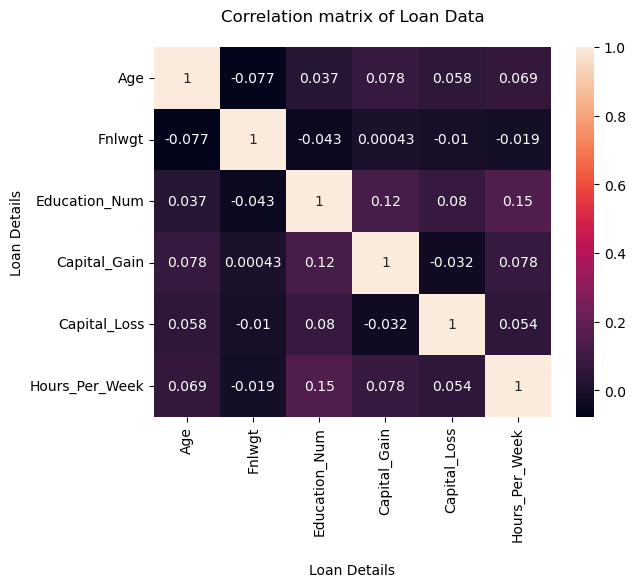

In [25]:
new_df_scaled=income_df_scaled[['Age', 'Fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']]
hm = sns.heatmap(new_df_scaled.corr(), annot = True)
hm.set(xlabel='\nLoan Details', ylabel='Loan Details', title = "Correlation matrix of Loan Data\n")
plt.show()

# Task 6

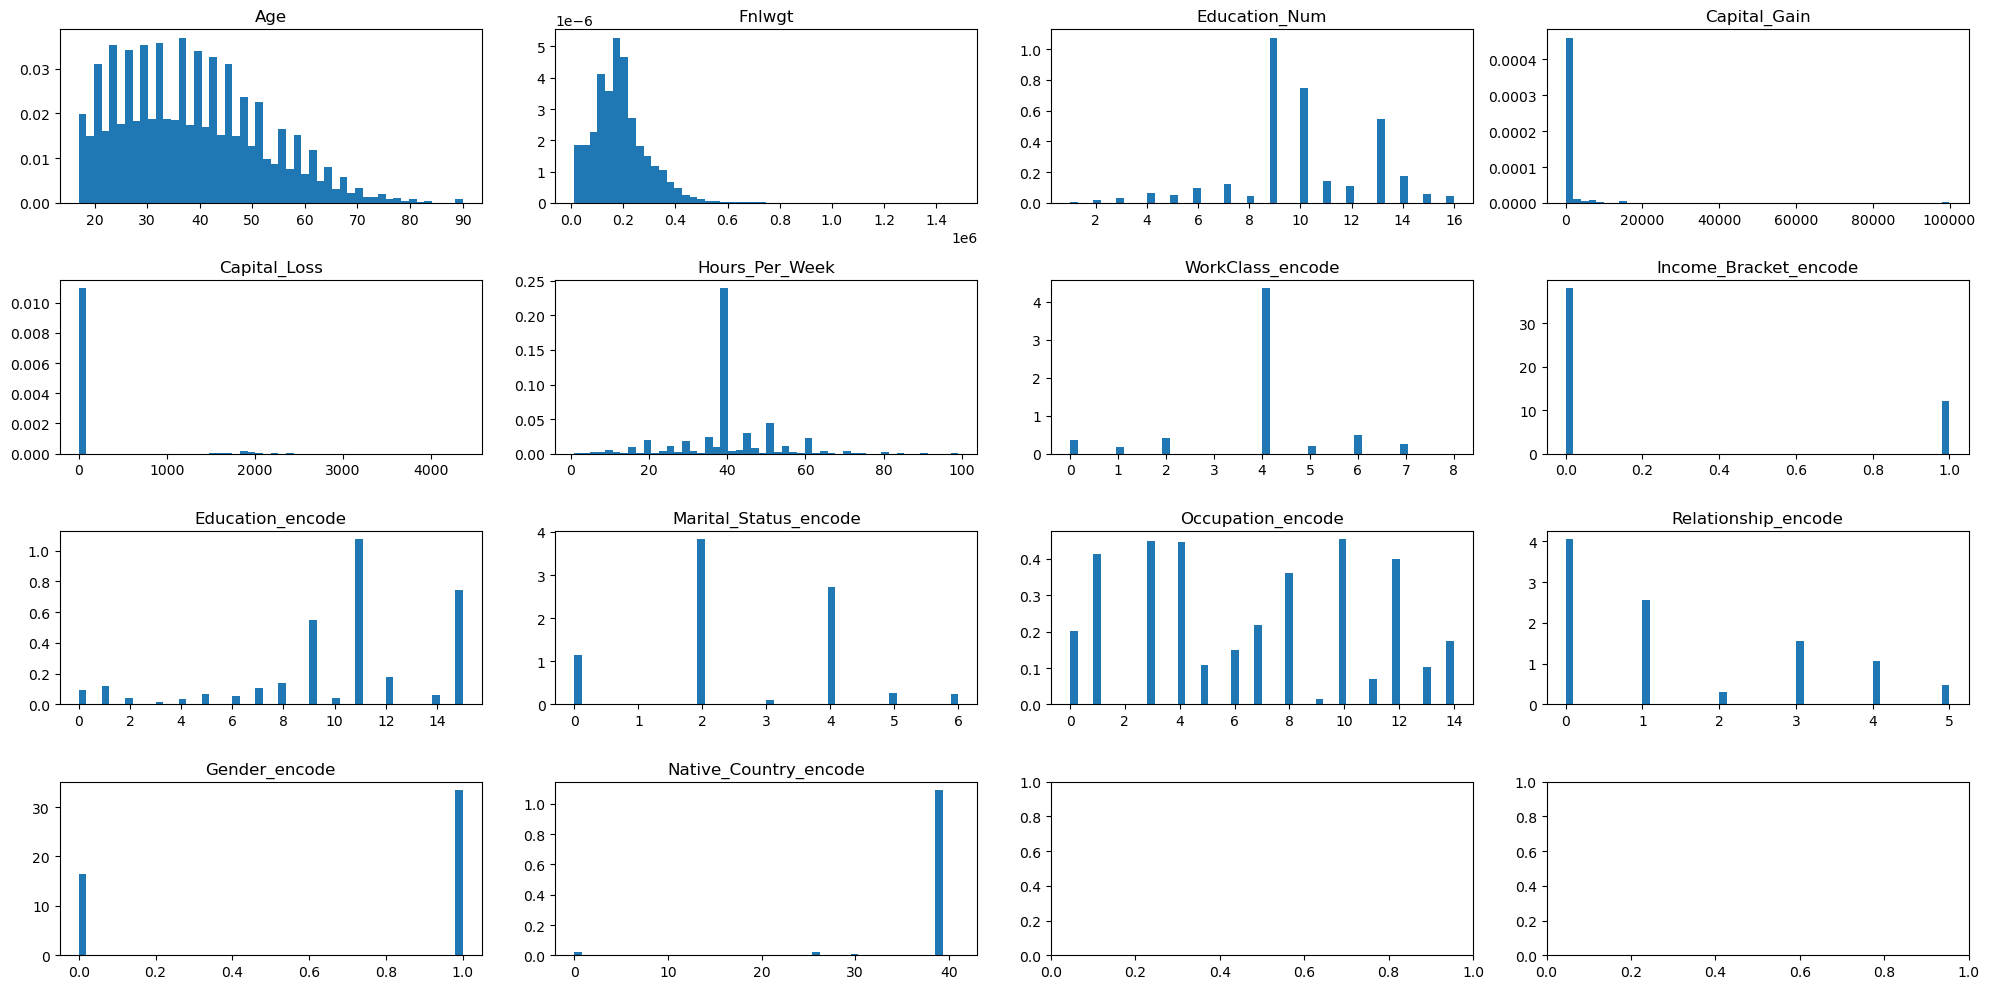

In [26]:
# Histogram of all numerical features

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_income_df = income_df.select_dtypes(include=numerics)
numeric_cols=new_income_df.columns
num_cols=4
n_bins = 50

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_income_df[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

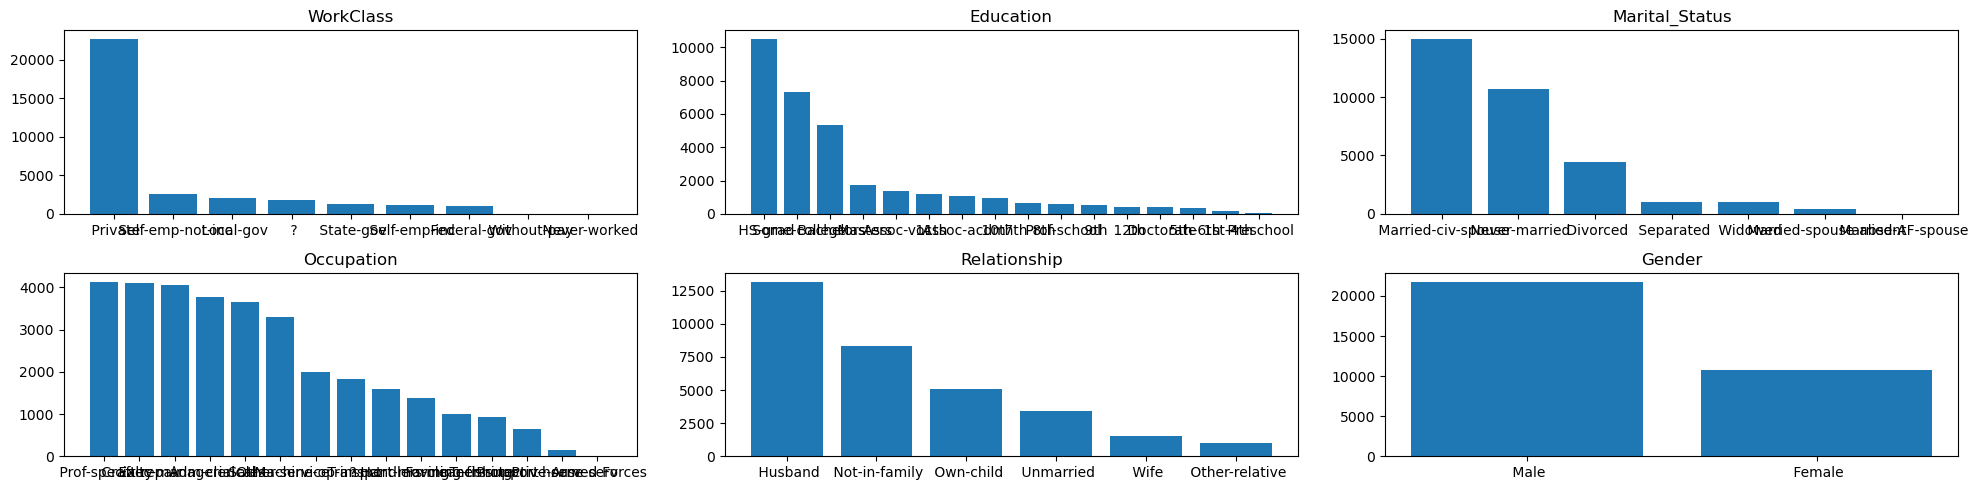

In [27]:
# Histogram of all categorical features
num_cols = 3
cat_income_df = income_df.select_dtypes('category')
categorical_cols=cat_income_df.columns

# compute number of rows for plot 
num_rows= int(len(categorical_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,5))

# plotting the numerical columns
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
    stats = cat_income_df[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join((str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
    
plt.show()

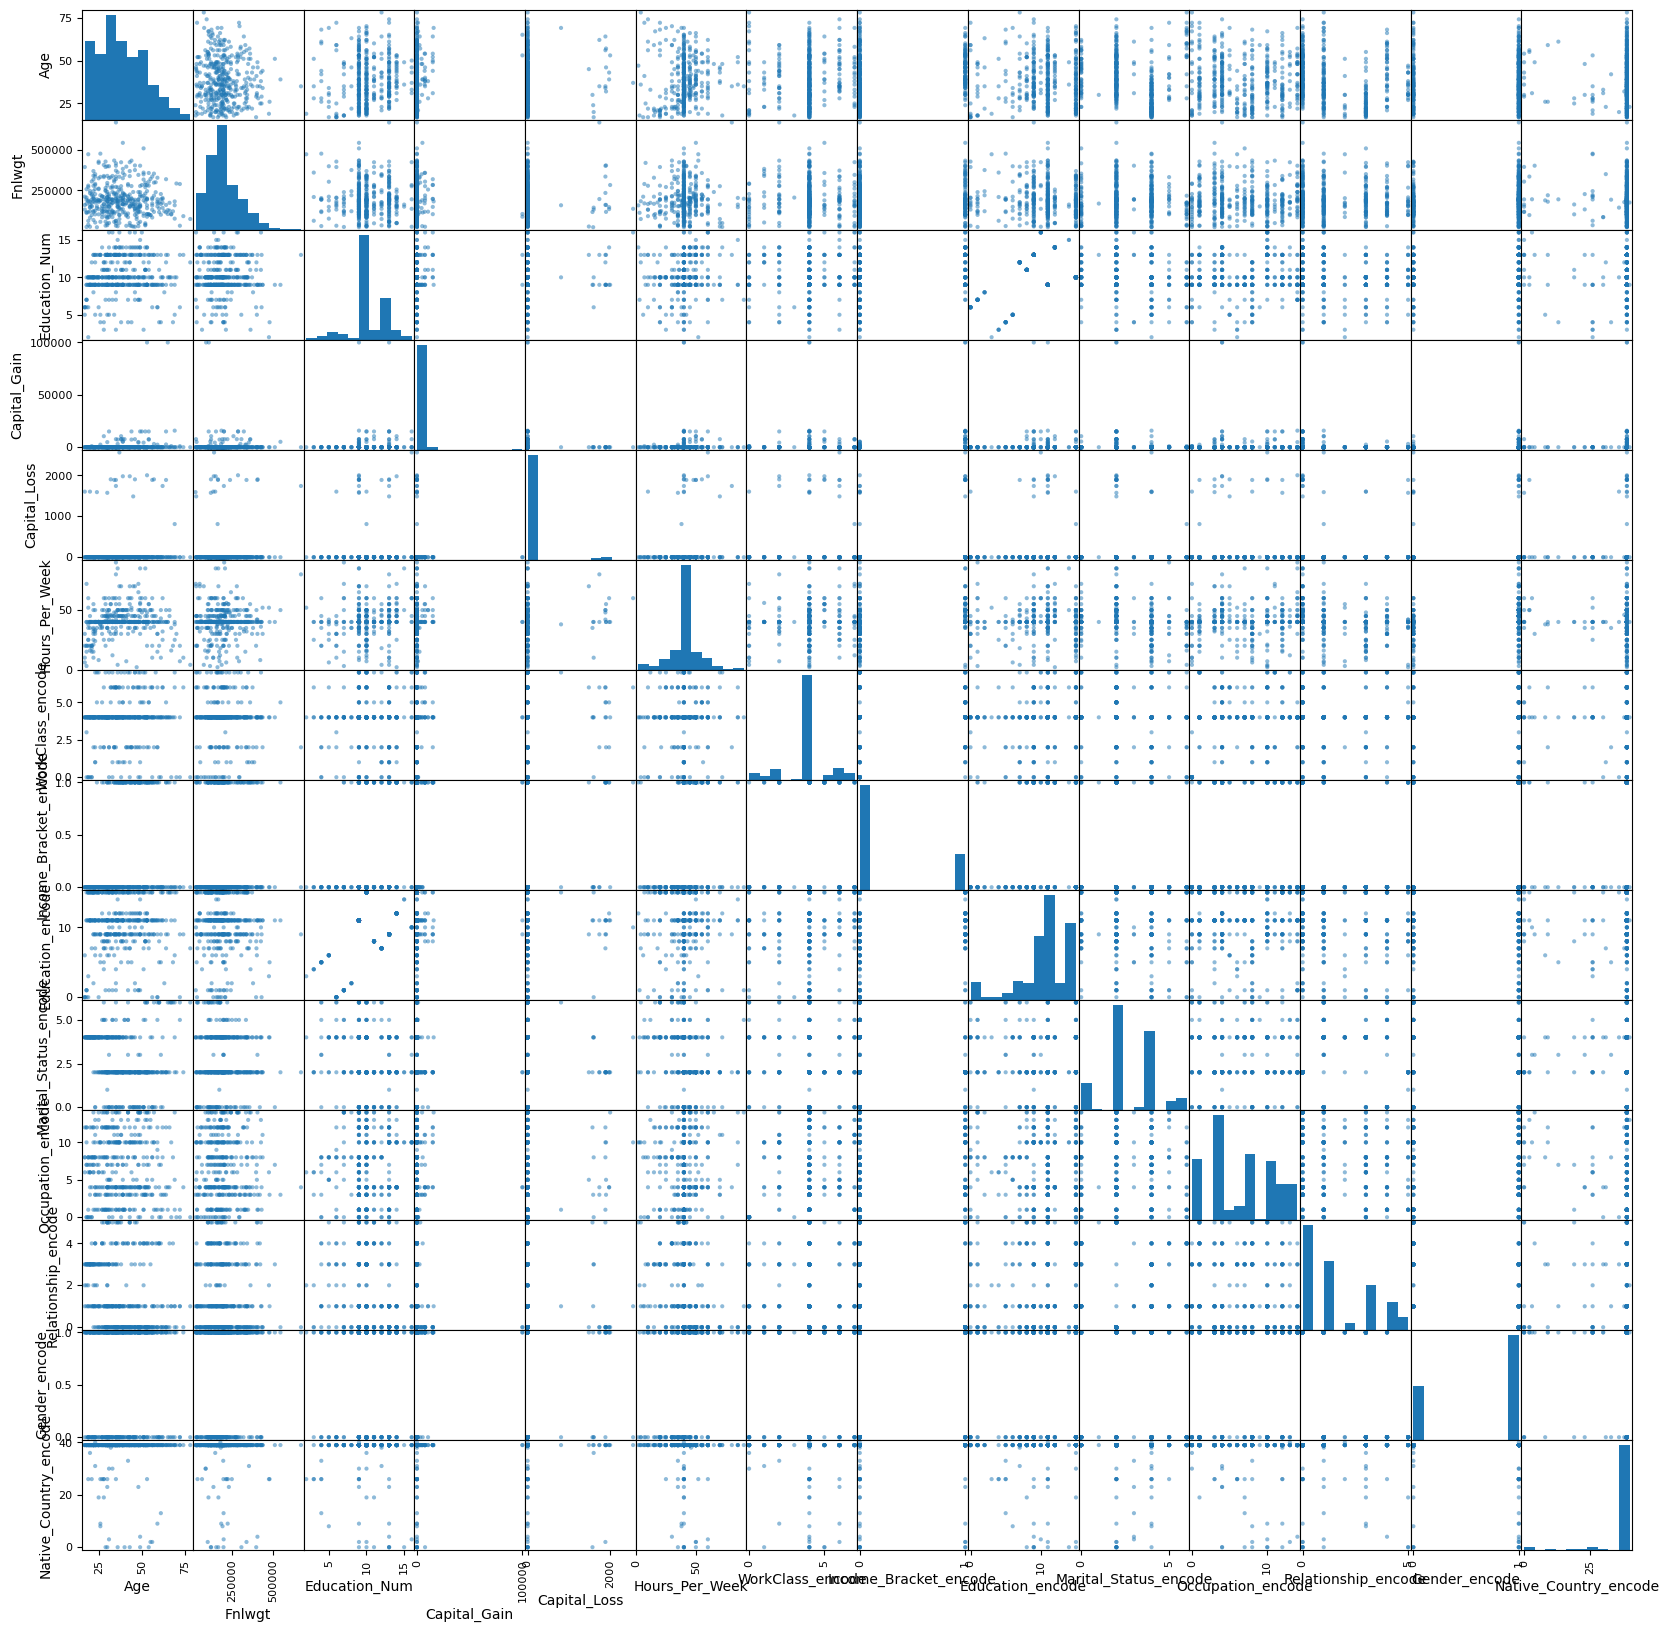

In [28]:
# Scatter Matrix plot of all columns
pd.plotting.scatter_matrix(income_df[numeric_cols].sample(400),figsize=(20,20))
plt.show()

[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ..., ' Tech-support', 'Craft-repair', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']
Length: 15
Categories (15, object): ['Craft-repair', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ..., ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving']


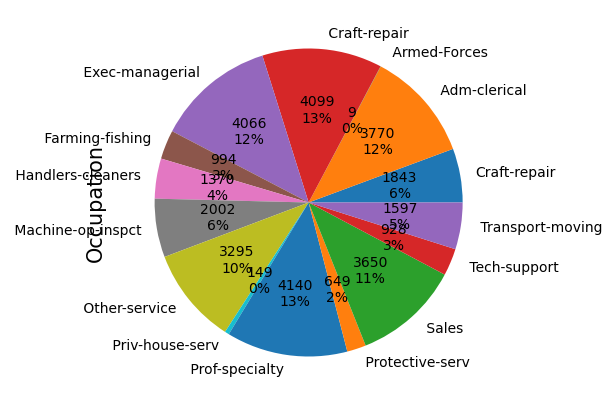

In [37]:
# Pie charts of categorical features
labels=income_df_c['Occupation'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(income_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

#plt.pie(income_df_c['purpose_encode'])
income_df_c.groupby(income_df_c['Occupation']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Occupation', size=15)
# show plot
plt.show()

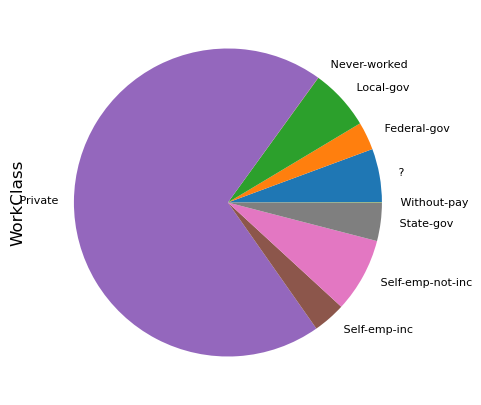

In [31]:
# Pie charts of categorical features
#def label_function(val):
 #   return f'{val / 100 * len(income_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

#plt.pie(income_df_c['purpose_encode'])
income_df_c.groupby(income_df_c['WorkClass']).size().plot(kind='pie', textprops={'fontsize': 8}, ax=ax)
ax.set_ylabel('WorkClass', size=12)
# show plot
plt.show()

[' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
Categories (7, object): [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']


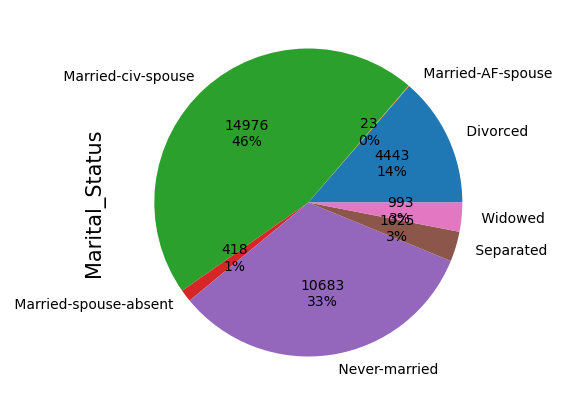

In [32]:
# Pie charts of categorical features
labels=income_df_c['Marital_Status'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(income_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

#plt.pie(income_df_c['purpose_encode'])
income_df_c.groupby(income_df_c['Marital_Status']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Marital_Status', size=15)
# show plot
plt.show()

[' Male', ' Female']
Categories (2, object): [' Female', ' Male']


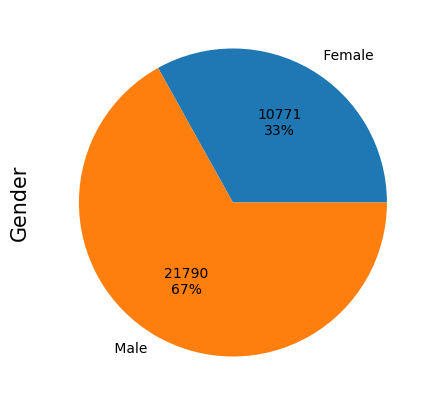

In [34]:
# Pie charts of categorical features
labels=income_df_c['Gender'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(income_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

#plt.pie(income_df_c['purpose_encode'])
income_df_c.groupby(income_df_c['Gender']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Gender', size=15)
# show plot
plt.show()

[' <=50K', ' >50K']
Categories (2, object): [' <=50K', ' >50K']


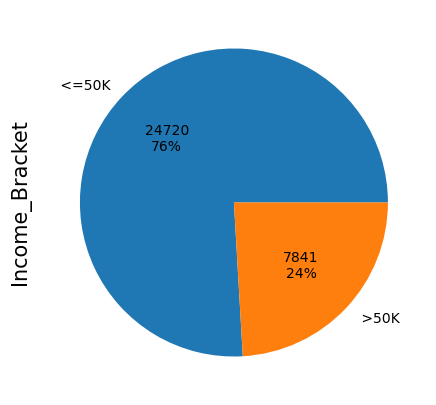

In [35]:
# Pie charts of categorical features
labels=income_df_c['Income_Bracket'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(income_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

#plt.pie(income_df_c['purpose_encode'])
income_df_c.groupby(income_df_c['Income_Bracket']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Income_Bracket', size=15)
# show plot
plt.show()